In [1]:
## Bring in needed Mods
import pandas as pd, numpy as np, glob

## Load in matplotlib 
from matplotlib import pyplot as plt

## Load library of costom ftns
import transposonmobility as tmi

In [2]:
## Load in a chromosome map
Chrommap = tmi.loadmap()

## View head
Chrommap.head()

,T_name,T_size,Chrom,Cumpos,Midpts
0,XL280_Chr01,2309367,Chr01,0.0,1154683.5
1,XL280_Chr02,1649372,Chr02,2309367.0,3134053.0
2,XL280_Chr03,2117115,Chr03,3958739.0,5017296.5
3,XL280_Chr04,1793304,Chr04,6075854.0,6972506.0
4,XL280_Chr05,1473595,Chr05,7869158.0,8605955.5


In [3]:
## Set the color map to be used
qtlcolormap = tmi.colormap

## Gather sample info
sampleinfo = tmi.sampleinfo

## View head
sampleinfo.head()

,Sample,Passaged,Isolate,Name
0,23,0,4,XL280.3
1,21,0,1,XL280.1
2,1,30,1,30-01
3,2,30,1,Duplicate-30-01
4,3,30,1,30-02


In [4]:
## Load in centromeres
centromeres = tmi.loadcents()

## View centromere
centromeres.head()

,Sequence Name,Name,Minimum,Maximum,Length,Contig
0,XL280_Chr01,CEN1,932060,992559,60500,Chr01
1,XL280_Chr02,CEN2,870793,920730,49938,Chr02
2,XL280_Chr03,CEN3,810992,909244,98253,Chr03
3,XL280_Chr04,CEN4,216606,283957,67352,Chr04
4,XL280_Chr05,CEN5,774946,853557,78612,Chr05


In [5]:
## Load in gff
gff = tmi.loadgff()

## view tail
gff.tail()

,chrom,source,type,score,strand,phase,attribute,ID,Zstart,Zend
118822,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_3;Parent=CNH03020-t26_1,CNH03020,782218,782333
118823,Chr14,114,exon,0.621846,-,.,ID=exon_CNH03020-E2;Parent=CNH03020-t26_1,CNH03020,782386,782471
118824,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_4;Parent=CNH03020-t26_1,CNH03020,782386,782471
118825,Chr14,114,exon,0.621846,-,.,ID=exon_CNH03020-E1;Parent=CNH03020-t26_1,CNH03020,782528,782701
118826,Chr14,114,five_prime_UTR,0.621846,-,.,ID=utr_CNH03020-t26_1_5;Parent=CNH03020-t26_1,CNH03020,782528,782701


In [6]:
## Set the name of the TE to be analyzed
TE_name = 'T1'

## Set the path to the blat resutls 
temp_path = '../BLAT/%s/BLAT_%s*.csv.gz'%(TE_name,TE_name)

## Load in TE hits using our ftns
TE_hits = tmi.loadhits(temp_path)

We have detected data for 23 samples


In [7]:
TE_hits.head()

,match,mismatch,rep_match,Ns,Q_gap_count,Q_gap_bases,T_gap_count,T_gap_bases,T_strand,Q_name,...,tStarts,Q_frac,TE_T_start,TE_T_end,TE_T_name,TE_Q_frac,Read,Sample,Lane,Chrom
0,76,0,0,0,0,0,0,0,+,493774,...,"31130,",1.0,9,85,T1,1.000000,1,10,1,Chr06
1,76,0,0,0,0,0,0,0,+,1305858,...,"832649,",1.0,600,676,T1,0.934211,1,10,1,Chr06
2,76,0,0,0,0,0,0,0,+,623559,...,"30958,",1.0,379,455,T1,0.947368,1,10,1,Chr06
3,76,0,0,0,0,0,0,0,-,1646806,...,"33927,",1.0,290,366,T1,0.973684,1,10,1,Chr06
4,76,0,0,0,0,0,0,0,-,639843,...,"33917,",1.0,500,575,T1,0.934211,2,10,1,Chr06


In [8]:
## Set y and other lables
my_ylabel = '# of Paired reads\nbetween\n%s and chromosome'%TE_name

## Set the labels used by Asiay for XL280, non-passaged strains
asiya_labels = ['XL280.%s'%(i) for i in np.arange(1,4)]

## Make a figure layout index
figmap = [2] + list(np.arange(5,15))

In [9]:
## via chromosome windows count the number of anchor reads
tedfall = tmi.tedfall(hits=TE_hits)

## How large is this dataframe
tedfall.shape

(44643, 7)

In [10]:
## View head
tedfall.head()

,Pos,Reads,Chrom,Sample,Passaged,Isolate,Name
0,5000,0,Chr01,23,0,4,XL280.3
1,15000,0,Chr01,23,0,4,XL280.3
2,25000,0,Chr01,23,0,4,XL280.3
3,35000,0,Chr01,23,0,4,XL280.3
4,45000,0,Chr01,23,0,4,XL280.3


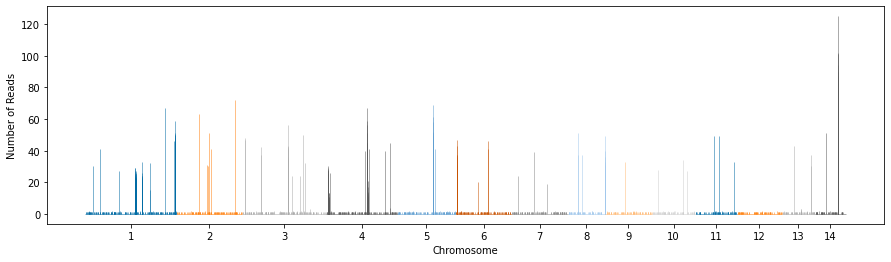

In [11]:
## Test our manhattan plot
tmi.manhattan_plot(tedfall,figsize=(15,4))

In [12]:
## Gather sample information for isolate one
iso1 = sampleinfo[(sampleinfo.Isolate==1)].reset_index(drop=True)
iso1

,Sample,Passaged,Isolate,Name
0,21,0,1,XL280.1
1,1,30,1,30-01
2,2,30,1,Duplicate-30-01
3,3,30,1,30-02
4,4,30,1,30-16
5,5,30,1,Duplicate-30-16
6,11,37,1,37-01
7,12,37,1,37-02
8,13,37,1,37-16
9,14,37,1,37-17


In [13]:
## Sub sample data for samples from isolate one at 37 C
forfig2B = sampleinfo[(sampleinfo.Passaged==37) & (sampleinfo.Isolate==1) & (sampleinfo.Sample.isin([11,12,15])) | (sampleinfo.Sample==21)].reset_index(drop=True)

## View the dataframe
forfig2B

,Sample,Passaged,Isolate,Name
0,21,0,1,XL280.1
1,11,37,1,37-01
2,12,37,1,37-02
3,15,37,1,37-03


In [14]:
## Gather the unique contig names
contigs = Chrommap.Chrom.unique()

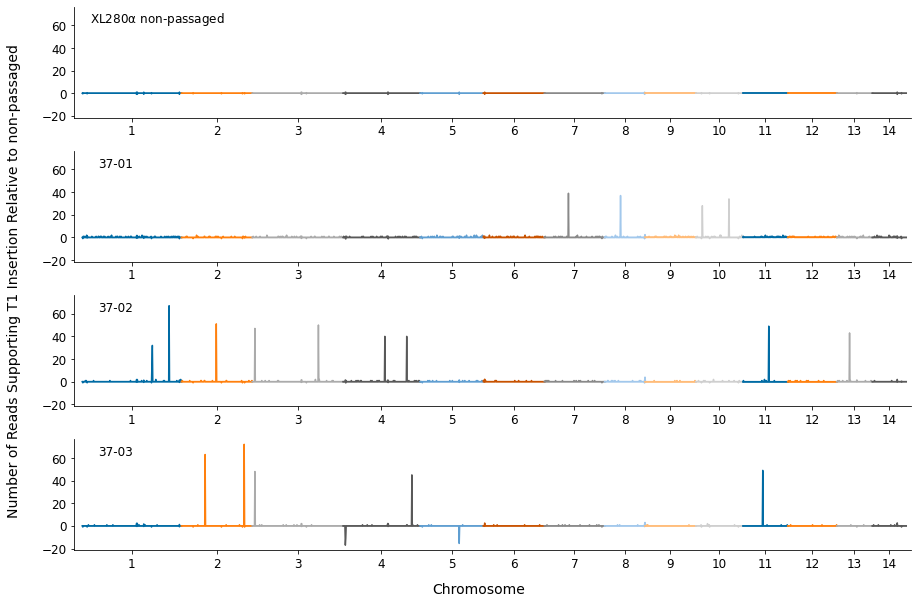

In [15]:
fig,ax = plt.subplots(forfig2B.shape[0],1,figsize=(15,10),sharey=True);
fig.set_facecolor('w')

for k,j in forfig2B.iterrows():
    
    plt.sca(ax[k])
    
    s = j.Name.split('.')[0]

    plt.title(s + '$\mathrm{\u03B1}$' +' non-passaged' if k == 0 else s,
              x=0.1 if (k == 0) else 0.05, y=0.8,fontsize=12)
    
    if k == 0:
        wti = j.Sample
    else:
        pass
    
    for i,cont in enumerate(contigs):
        
        xc = tedfall[(tedfall.Sample==j.Sample) & (tedfall.Chrom==cont)]
        
        wtxc = tedfall[(tedfall.Sample==wti) & (tedfall.Chrom==cont)]
        
        chromcolor = qtlcolormap[i%int(len(qtlcolormap))]
        cumpos = Chrommap[(Chrommap.Chrom==cont)].Cumpos.min()
        
        plt.plot(xc.Pos.values+cumpos, xc.Reads.values/(wtxc.Reads.values+1),color=chromcolor)
        plt.plot(xc.Pos.values+cumpos, -1*wtxc.Reads.values/(xc.Reads.values+1),color=chromcolor)
    
    plt.xlim(-200000,19.3*10**6)
    plt.xticks(Chrommap.Midpts,Chrommap.index.values+1,fontsize=12)
    plt.yticks(fontsize=12)

    [ax[k].spines[sp].set_visible(False) for sp in ['top','right']]

fig.text(0.5,0.07,va='center',ha='center',
        fontsize=14,s='Chromosome')

fig.text(0.07,0.5,rotation=90,va='center',ha='center',fontsize=14,
         s='Number of Reads Supporting %s Insertion Relative to non-passaged'%TE_name)
plt.subplots_adjust(hspace=0.3)
plt.savefig('../FIGURES/Figure_2B.png',dpi=400,bbox_inches='tight')